# Plasma AA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
dl_path = r'/Users/serhat.say/Downloads/'

In [4]:
xls = pd.ExcelFile(dl_path+'dataset.xlsx',engine='openpyxl')

## Binary class

In [5]:
df_binary=pd.read_excel(xls,'binary')

In [6]:
df_binary.head()

,SID,SEX,Tau,Thr,Ser,Glu,Gln,Pro,Gly,Ala,Citr,Val,Met,Ile,Leu,Tyr,Phe,Orn,Lys,His,Arg,ASA,Allo,Hcys,Glu.Gln,Citr.Gln,Gly.Total.AA,BCAA.Total.AA,Leu.Ala,Class
0,1.0,M,174.0,55.0,85.0,205.0,1579.0,204.0,272.0,605.0,252.0,99.0,56.0,20.0,62.0,188.0,52.0,18.0,102.0,109.0,13.0,Y,N,N,1784.0,0.159595,0.065542,0.043614,0.102479,X.Abnormal
1,2.0,F,56.0,54.0,107.0,125.0,633.0,156.0,321.0,378.0,174.0,90.0,22.0,23.0,48.0,48.0,37.0,57.0,120.0,84.0,52.0,Y,N,N,758.0,0.274882,0.124178,0.062282,0.126984,X.Abnormal
2,3.0,F,50.0,50.0,65.0,71.0,620.0,166.0,244.0,338.0,107.0,128.0,14.0,58.0,72.0,38.0,42.0,60.0,60.0,75.0,73.0,Y,N,N,691.0,0.172581,0.104676,0.110682,0.213018,X.Abnormal
3,4.0,F,74.0,64.0,85.0,60.0,516.0,272.0,239.0,377.0,125.0,166.0,18.0,45.0,80.0,58.0,46.0,119.0,73.0,79.0,67.0,Y,N,N,576.0,0.242248,0.093250,0.113539,0.212202,X.Abnormal
4,5.0,F,79.0,58.0,118.0,173.0,1426.0,266.0,285.0,4464.0,2174.0,106.0,99.0,14.0,77.0,74.0,41.0,30.0,414.0,109.0,18.0,N,N,N,1599.0,NaN,0.028429,0.019651,0.017249,X.Abnormal


In [7]:
df_binary.shape

(2084, 30)

In [8]:
df_binary.drop_duplicates(inplace=True)

In [9]:
df_binary.shape

(2084, 30)

In [10]:
df_binary.Class.value_counts()

No.significant.abnormality.detected.    1440
X.Abnormal                               644
Name: Class, dtype: int64

In [11]:
df_binary.Class.value_counts(1)

No.significant.abnormality.detected.    0.690979
X.Abnormal                              0.309021
Name: Class, dtype: float64

In [12]:
df_binary['Class'] = np.where(df_binary.Class =='X.Abnormal',1,0)

In [13]:
df_binary.head()

,SID,SEX,Tau,Thr,Ser,Glu,Gln,Pro,Gly,Ala,Citr,Val,Met,Ile,Leu,Tyr,Phe,Orn,Lys,His,Arg,ASA,Allo,Hcys,Glu.Gln,Citr.Gln,Gly.Total.AA,BCAA.Total.AA,Leu.Ala,Class
0,1.0,M,174.0,55.0,85.0,205.0,1579.0,204.0,272.0,605.0,252.0,99.0,56.0,20.0,62.0,188.0,52.0,18.0,102.0,109.0,13.0,Y,N,N,1784.0,0.159595,0.065542,0.043614,0.102479,1
1,2.0,F,56.0,54.0,107.0,125.0,633.0,156.0,321.0,378.0,174.0,90.0,22.0,23.0,48.0,48.0,37.0,57.0,120.0,84.0,52.0,Y,N,N,758.0,0.274882,0.124178,0.062282,0.126984,1
2,3.0,F,50.0,50.0,65.0,71.0,620.0,166.0,244.0,338.0,107.0,128.0,14.0,58.0,72.0,38.0,42.0,60.0,60.0,75.0,73.0,Y,N,N,691.0,0.172581,0.104676,0.110682,0.213018,1
3,4.0,F,74.0,64.0,85.0,60.0,516.0,272.0,239.0,377.0,125.0,166.0,18.0,45.0,80.0,58.0,46.0,119.0,73.0,79.0,67.0,Y,N,N,576.0,0.242248,0.093250,0.113539,0.212202,1
4,5.0,F,79.0,58.0,118.0,173.0,1426.0,266.0,285.0,4464.0,2174.0,106.0,99.0,14.0,77.0,74.0,41.0,30.0,414.0,109.0,18.0,N,N,N,1599.0,NaN,0.028429,0.019651,0.017249,1


### Random Forest

In [14]:
df_binary.dropna(inplace=True)

In [15]:
df_binary.shape

(2008, 30)

In [16]:
labels=df_binary['Class']

In [17]:
features = df_binary.drop(columns=['Class'])

In [18]:
features = pd.get_dummies(features)

In [19]:
feature_list = [e for e in list(features.columns) if e not in ['SID']]

In [20]:
features_model=features[feature_list]

In [21]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features_model, labels, test_size = 0.25, random_state = 42)

In [22]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1506, 33)
Training Labels Shape: (1506,)
Testing Features Shape: (502, 33)
Testing Labels Shape: (502,)


In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [24]:
predictions = rf.predict(test_features)

In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score(test_labels, predictions)

0.8819875776397514

Text(0.5, 0, 'Random Forest Feature Importance')

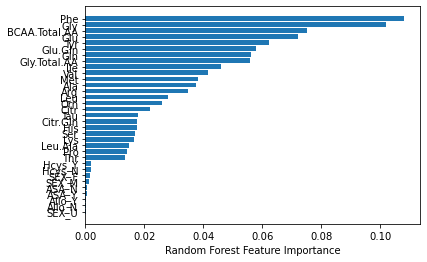

In [27]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(train_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Multi-class

In [28]:
df_multiclass=pd.read_excel(xls,'multiclass')

In [29]:
df_multiclass.head()

,SID,SEX,Tau,Thr,Ser,Glu,Gln,Pro,Gly,Ala,Citr,Val,Met,Ile,Leu,Tyr,Phe,Orn,Lys,His,Arg,ASA,Allo,Hcys,Glu.Gln,Citr.Gln,Gly.Total.AA,BCAA.Total.AA,Leu.Ala,Class
0,1.0,M,174.0,55.0,85.0,205.0,1579.0,204.0,272.0,605.0,252.0,99.0,56.0,20.0,62.0,188.0,52.0,18.0,102.0,109.0,13.0,Y,N,N,1784.0,0.159595,0.065542,0.043614,0.102479,X.Rare.IMD
1,2.0,F,56.0,54.0,107.0,125.0,633.0,156.0,321.0,378.0,174.0,90.0,22.0,23.0,48.0,48.0,37.0,57.0,120.0,84.0,52.0,Y,N,N,758.0,0.274882,0.124178,0.062282,0.126984,X.Rare.IMD
2,3.0,F,50.0,50.0,65.0,71.0,620.0,166.0,244.0,338.0,107.0,128.0,14.0,58.0,72.0,38.0,42.0,60.0,60.0,75.0,73.0,Y,N,N,691.0,0.172581,0.104676,0.110682,0.213018,X.Rare.IMD
3,4.0,F,74.0,64.0,85.0,60.0,516.0,272.0,239.0,377.0,125.0,166.0,18.0,45.0,80.0,58.0,46.0,119.0,73.0,79.0,67.0,Y,N,N,576.0,0.242248,0.093250,0.113539,0.212202,X.Rare.IMD
4,5.0,F,79.0,58.0,118.0,173.0,1426.0,266.0,285.0,4464.0,2174.0,106.0,99.0,14.0,77.0,74.0,41.0,30.0,414.0,109.0,18.0,N,N,N,1599.0,NaN,0.028429,0.019651,0.017249,X.Rare.IMD


In [30]:
df_multiclass.Class.value_counts()

No.significant.abnormality.detected.    1440
X.GE.OA.non.specific                      97
X.PKU                                     75
X.sample.deterioration                    72
X.Low.protein.intake                      64
X.Hyperammonaemia                         54
X.Poor.Nutrition                          53
X.Liver.impairment.immaturity             38
X.ketosis                                 35
X.Hyperinsulinaemia                       28
X.OTC.CPS1                                28
X.Lactic.acidosis                         25
X.Peri.mortem.collapse                    20
X.Rare.IMD                                19
X.Tyrosinaemia.Type.1                     15
X.MSUD                                    11
X.Homocystinuria                          10
Name: Class, dtype: int64

In [31]:
df_multiclass.Class.value_counts(1)

No.significant.abnormality.detected.    0.690979
X.GE.OA.non.specific                    0.046545
X.PKU                                   0.035988
X.sample.deterioration                  0.034549
X.Low.protein.intake                    0.030710
X.Hyperammonaemia                       0.025912
X.Poor.Nutrition                        0.025432
X.Liver.impairment.immaturity           0.018234
X.ketosis                               0.016795
X.Hyperinsulinaemia                     0.013436
X.OTC.CPS1                              0.013436
X.Lactic.acidosis                       0.011996
X.Peri.mortem.collapse                  0.009597
X.Rare.IMD                              0.009117
X.Tyrosinaemia.Type.1                   0.007198
X.MSUD                                  0.005278
X.Homocystinuria                        0.004798
Name: Class, dtype: float64

In [32]:
df_multiclass.dropna(inplace=True)

In [33]:
df_multiclass.drop_duplicates(inplace=True)

In [34]:
labels=df_multiclass['Class']

In [35]:
features = df_multiclass.drop(columns=['Class'])

In [36]:
features = pd.get_dummies(features)

In [37]:
feature_list = [e for e in list(features.columns) if e not in ['SID']]

In [38]:
features_model=features[feature_list]

In [39]:
train_features, test_features, train_labels, test_labels = train_test_split(features_model, labels, test_size = 0.25, random_state = 42)

In [40]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1506, 33)
Training Labels Shape: (1506,)
Testing Features Shape: (502, 33)
Testing Labels Shape: (502,)


In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [42]:
predictions = rf.predict(test_features)

In [43]:
f1_score(test_labels, predictions,average='weighted')

0.8643183045767648

In [44]:
f1_score(test_labels, predictions,average='macro')

0.6401559350262244

Text(0.5, 0, 'Random Forest Feature Importance')

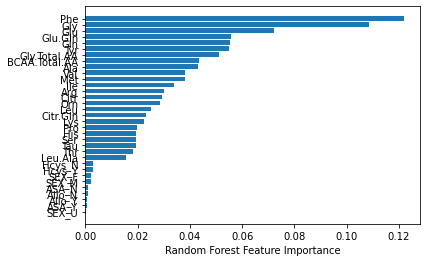

In [45]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(train_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [46]:
df_multiclass.Class.value_counts(1)

No.significant.abnormality.detected.    0.709163
X.GE.OA.non.specific                    0.048307
X.PKU                                   0.036853
X.sample.deterioration                  0.035359
X.Low.protein.intake                    0.028884
X.Hyperammonaemia                       0.026892
X.Poor.Nutrition                        0.026394
X.Liver.impairment.immaturity           0.018426
X.Hyperinsulinaemia                     0.013944
X.OTC.CPS1                              0.013446
X.Lactic.acidosis                       0.012450
X.Peri.mortem.collapse                  0.009960
X.Tyrosinaemia.Type.1                   0.007470
X.Rare.IMD                              0.005976
X.Homocystinuria                        0.004980
X.MSUD                                  0.001494
Name: Class, dtype: float64

In [47]:
class_list = list(df_multiclass.Class.unique())

X.Rare.IMD
F1 score for class:  X.Rare.IMD  is  0.5 which has  12  length


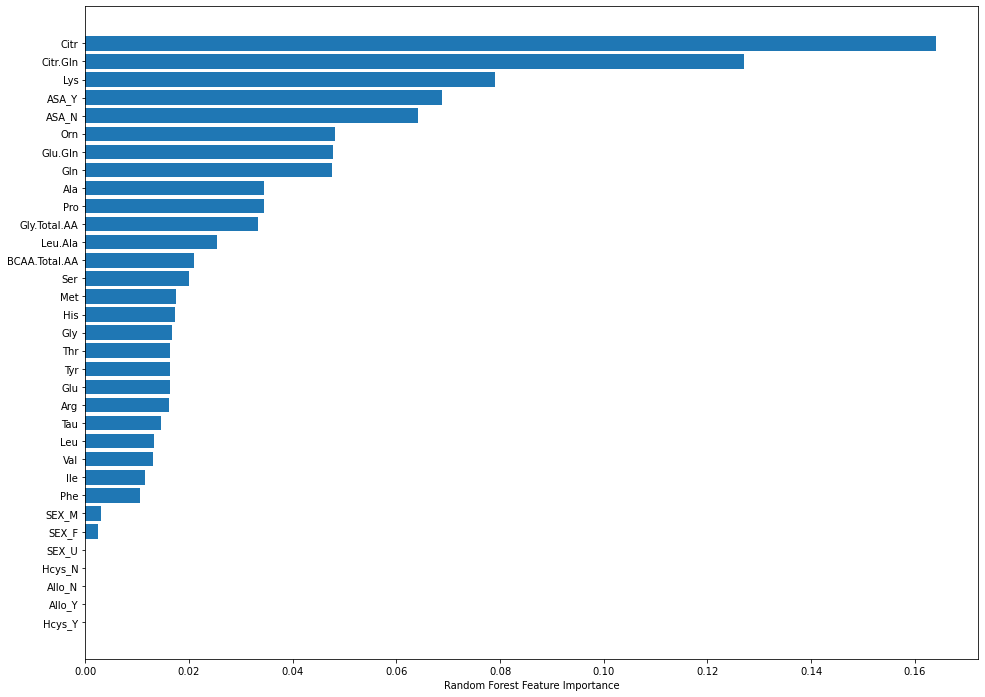

X.Homocystinuria


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


F1 score for class:  X.Homocystinuria  is  0.0 which has  10  length


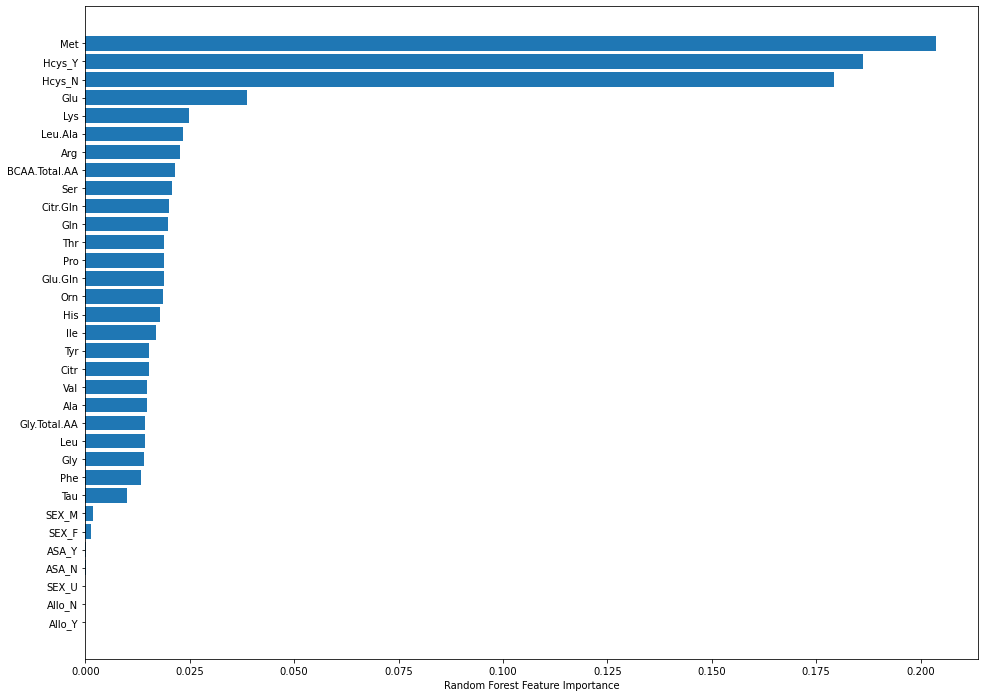

X.MSUD


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


F1 score for class:  X.MSUD  is  0.0 which has  3  length


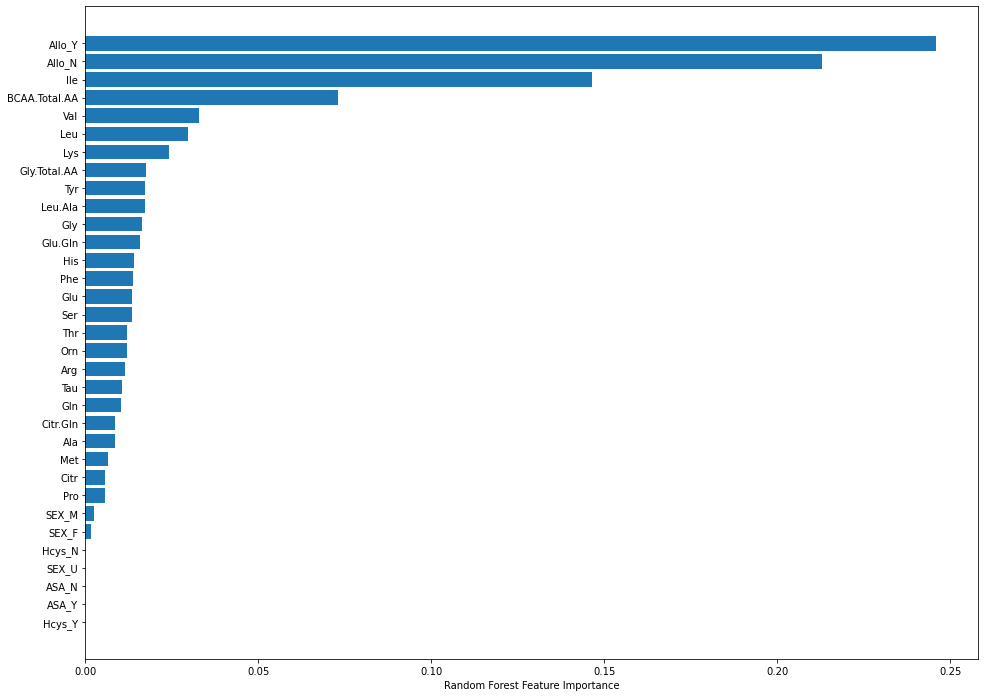

X.GE.OA.non.specific
F1 score for class:  X.GE.OA.non.specific  is  0.7555555555555554 which has  97  length


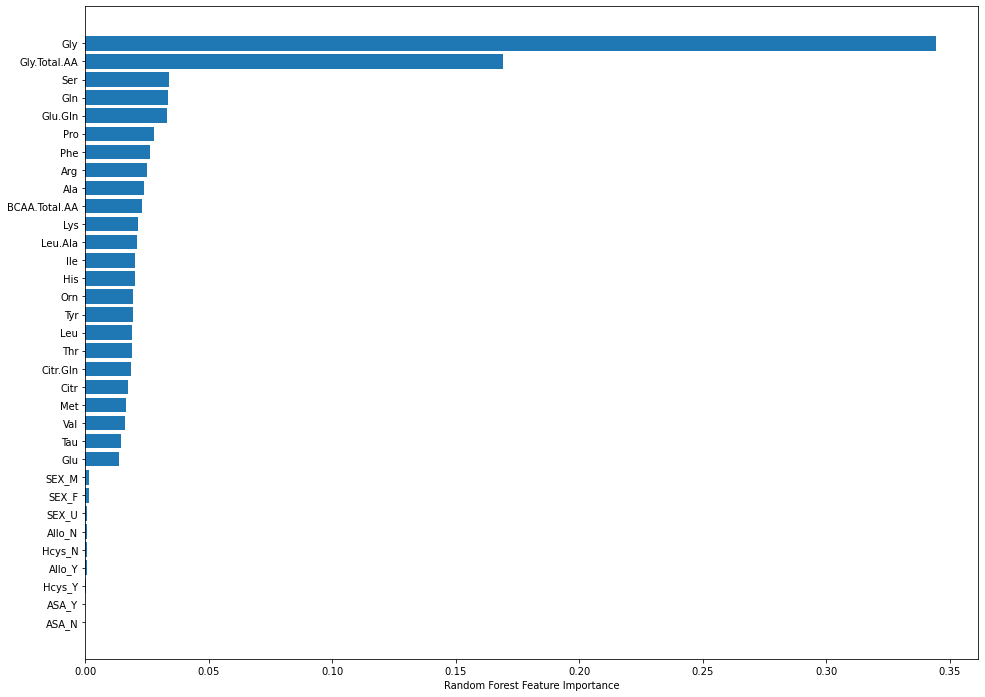

X.OTC.CPS1
F1 score for class:  X.OTC.CPS1  is  0.4615384615384615 which has  27  length


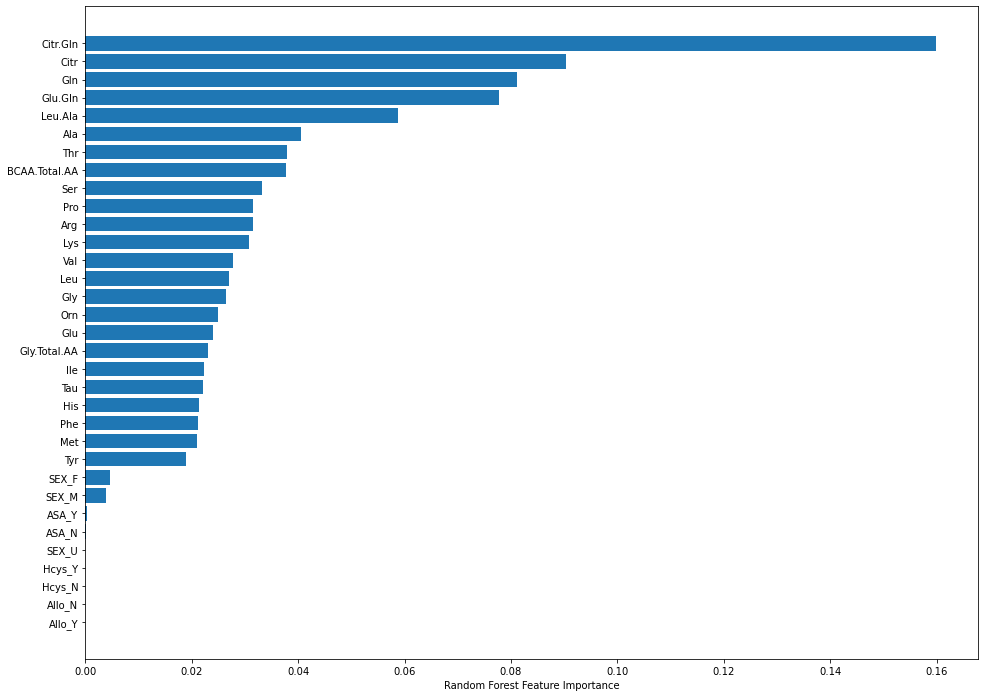

X.PKU
F1 score for class:  X.PKU  is  0.962962962962963 which has  74  length


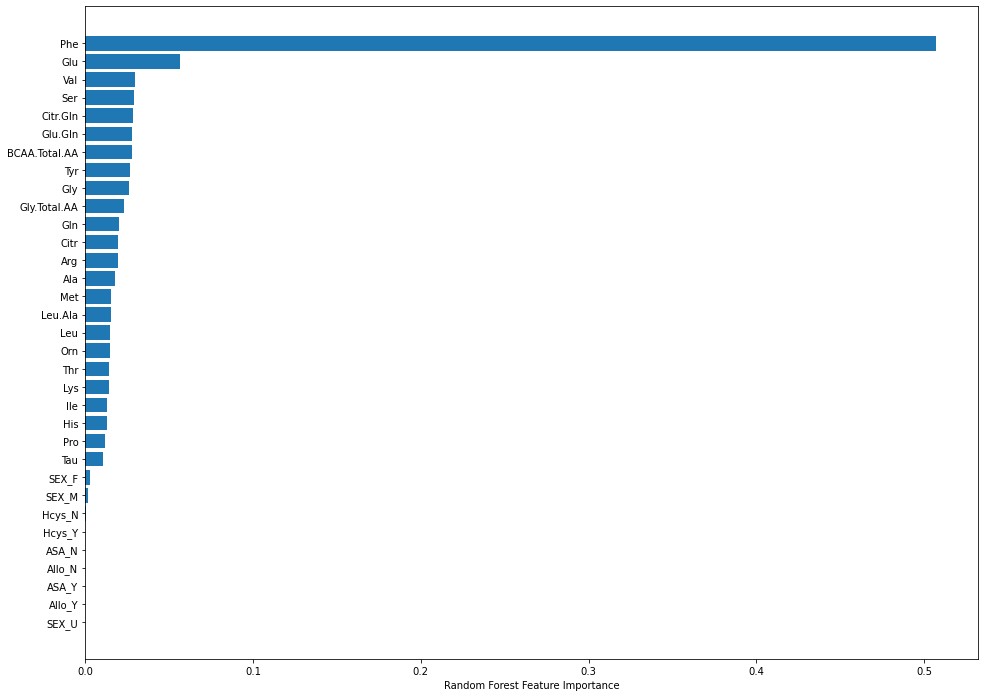

X.Tyrosinaemia.Type.1


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


F1 score for class:  X.Tyrosinaemia.Type.1  is  0.0 which has  15  length


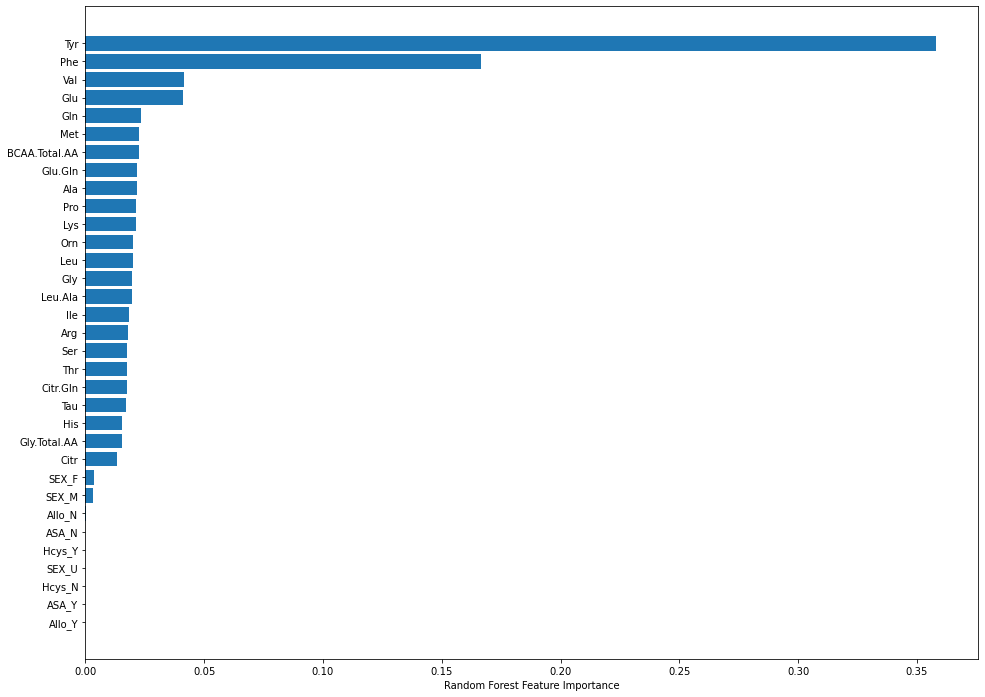

X.Hyperammonaemia
F1 score for class:  X.Hyperammonaemia  is  0.6153846153846154 which has  54  length


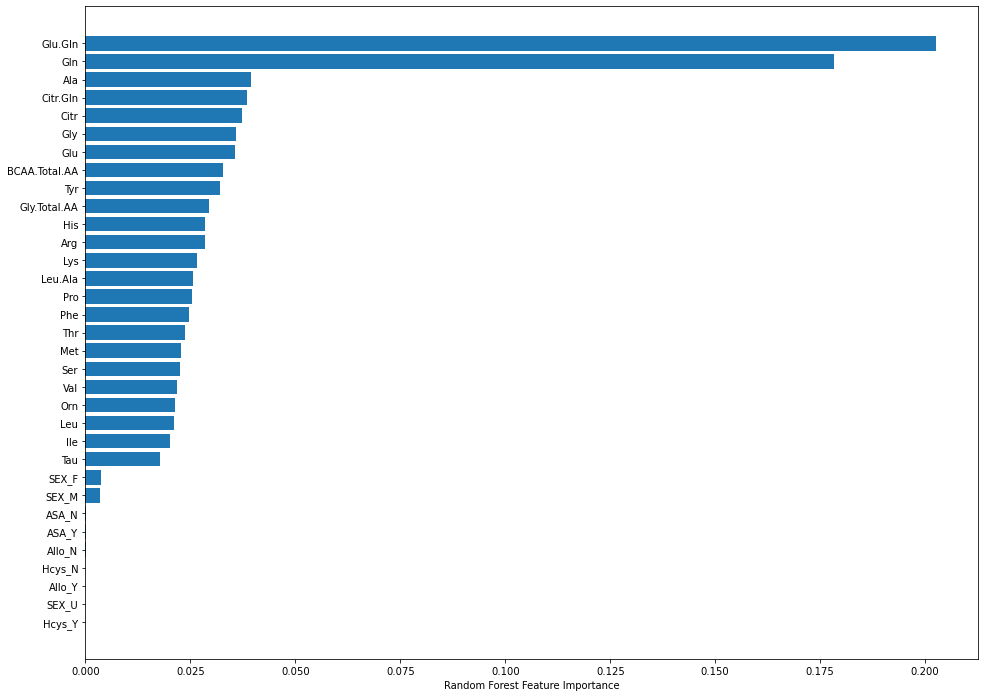

X.Hyperinsulinaemia
F1 score for class:  X.Hyperinsulinaemia  is  0.4 which has  28  length


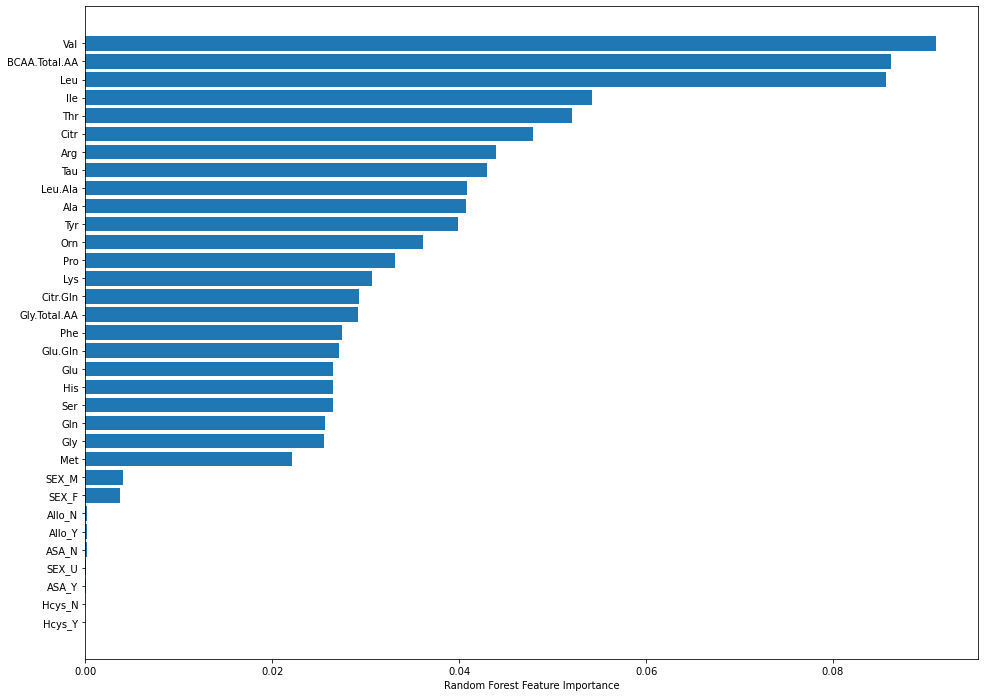

X.Lactic.acidosis
F1 score for class:  X.Lactic.acidosis  is  0.0 which has  25  length


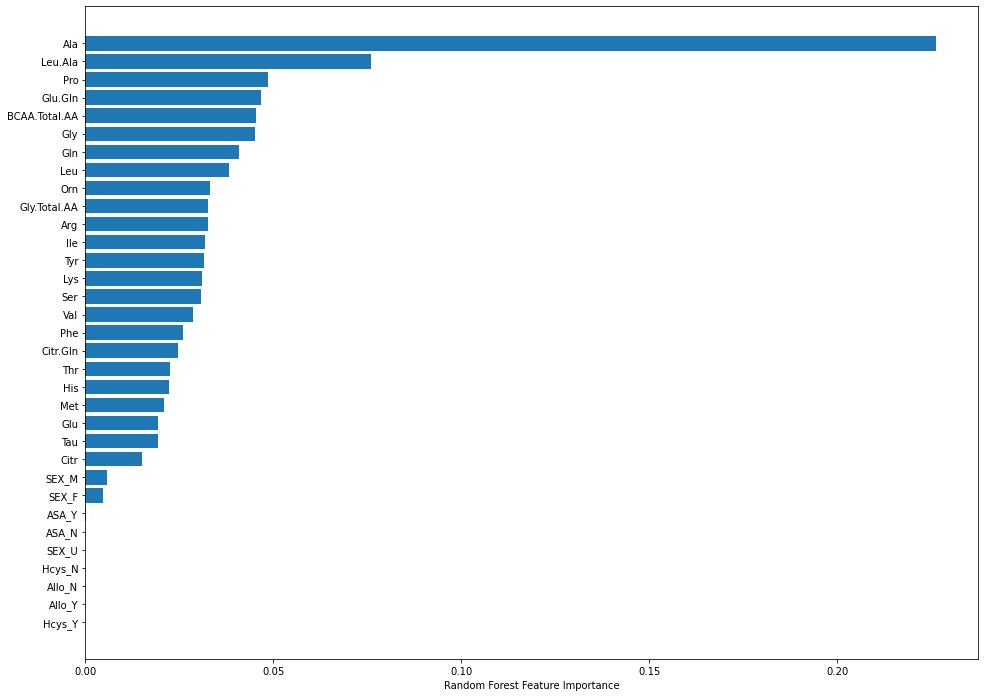

X.Low.protein.intake
F1 score for class:  X.Low.protein.intake  is  0.3636363636363636 which has  58  length


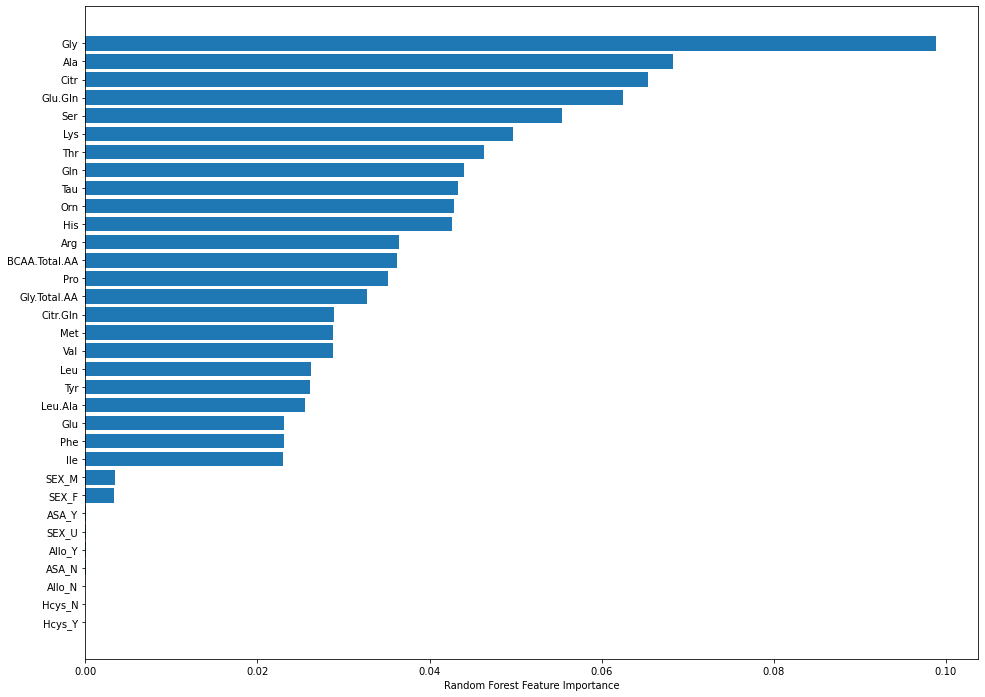

X.Peri.mortem.collapse
F1 score for class:  X.Peri.mortem.collapse  is  1.0 which has  20  length


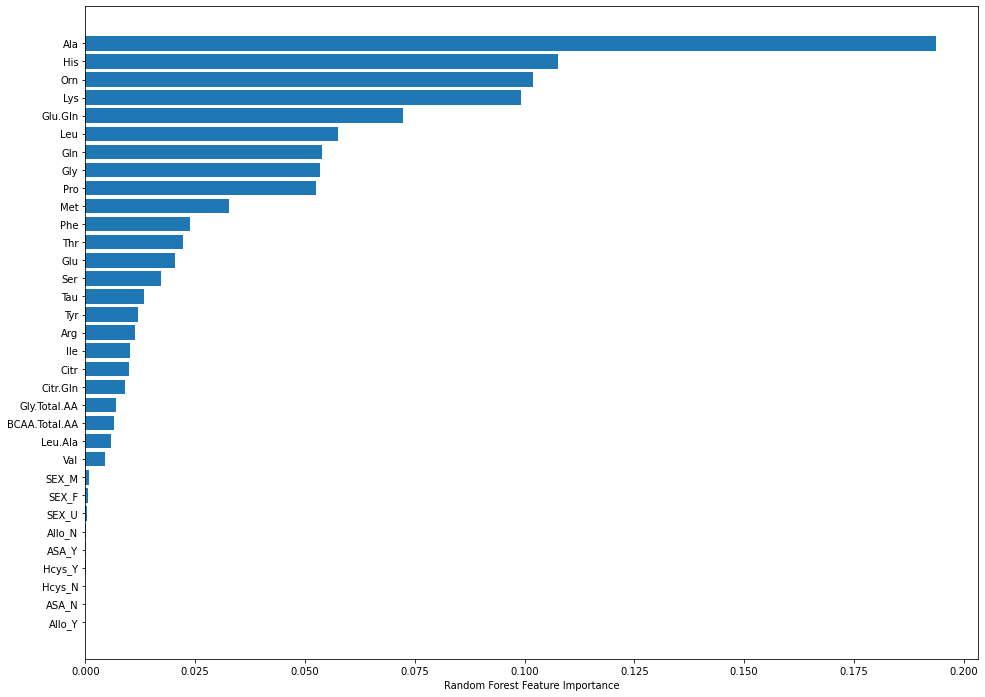

X.Poor.Nutrition
F1 score for class:  X.Poor.Nutrition  is  0.27272727272727276 which has  53  length


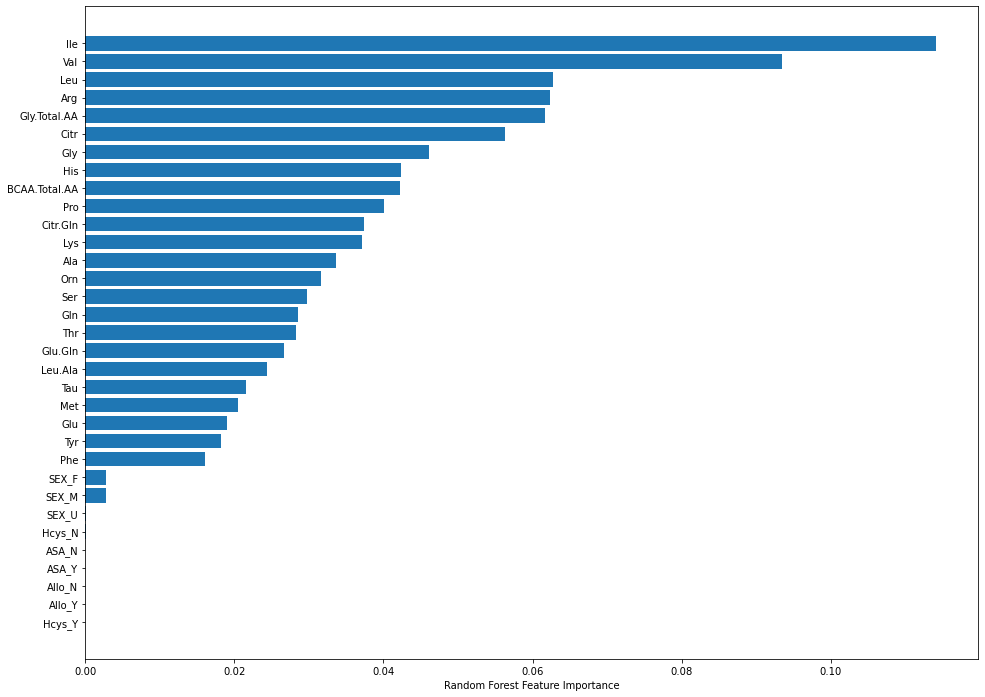

X.sample.deterioration
F1 score for class:  X.sample.deterioration  is  0.42857142857142855 which has  71  length


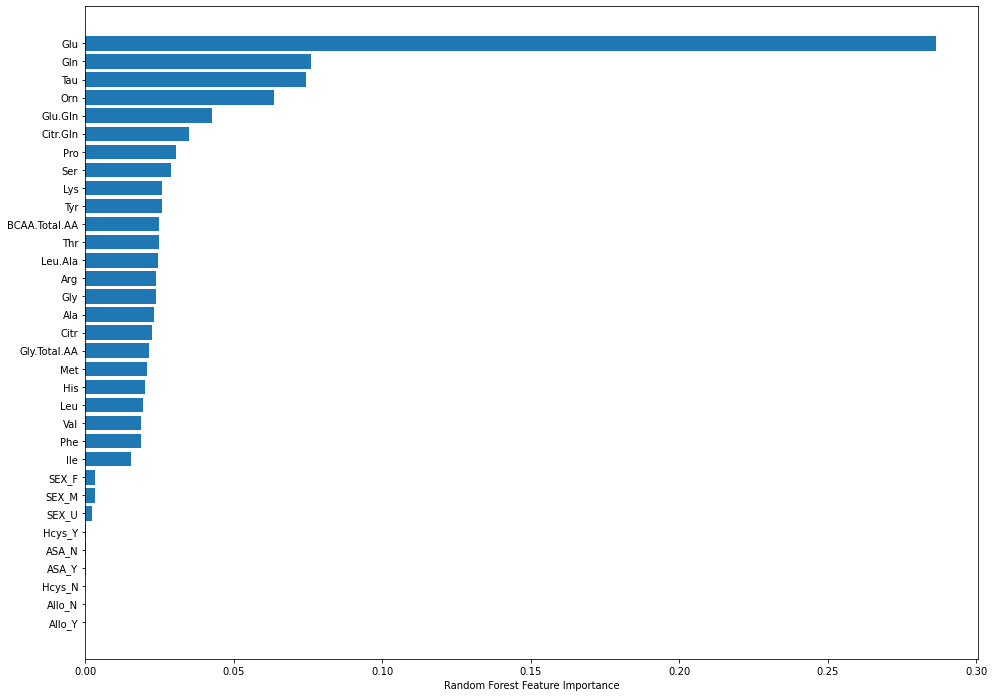

X.Liver.impairment.immaturity
F1 score for class:  X.Liver.impairment.immaturity  is  0.25 which has  37  length


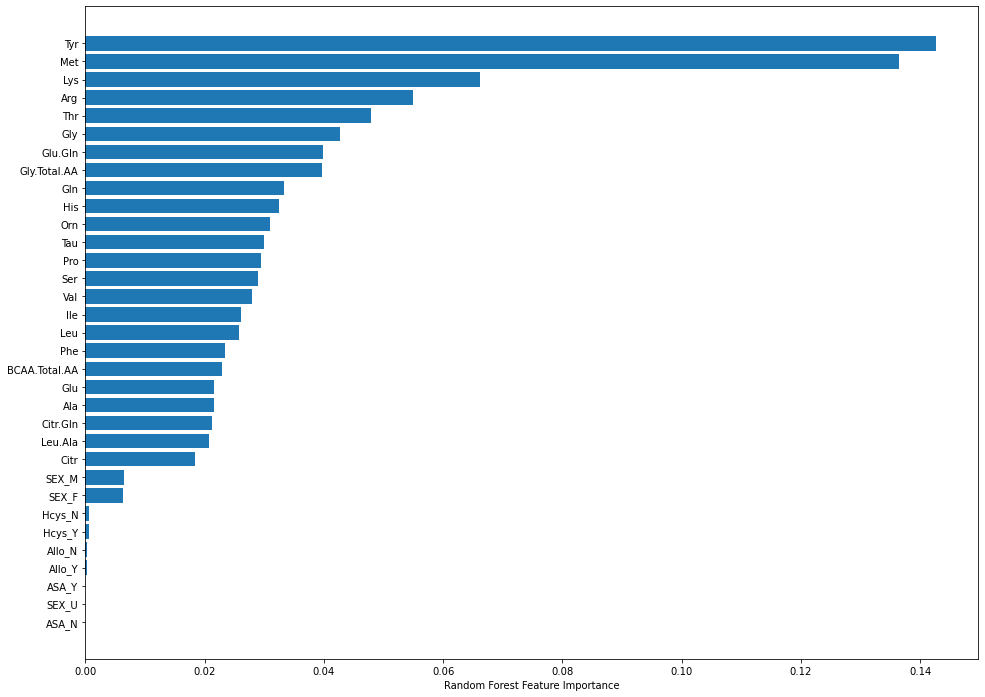

No.significant.abnormality.detected.
F1 score for class:  No.significant.abnormality.detected.  is  0.9442815249266863 which has  1424  length


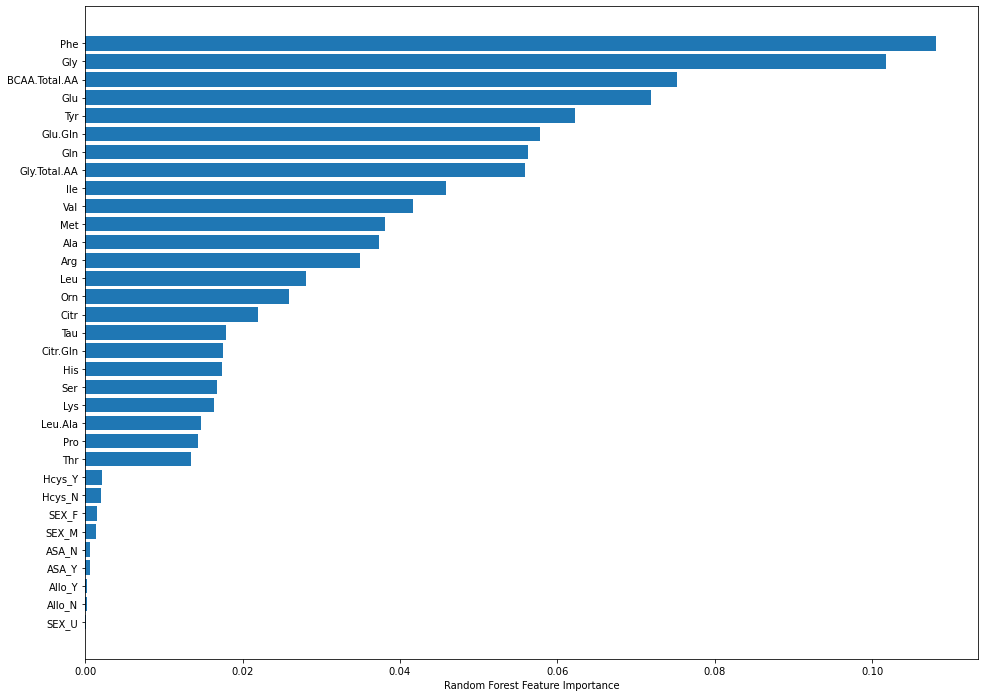

In [48]:
for class_val in  class_list:
    df = df_multiclass.copy()
    print(class_val)
    zero_class_list = [e for e in class_list if e not in class_val]
    
    df['Class'] = np.where(df.Class==class_val,1,0)
    
    
    col_list = list(df.columns)
    
    feature_list = [e for e in col_list if e not in ['SID','Class']]
    labels = df['Class']
    
    features = pd.get_dummies(df[feature_list])
    
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
    rf.fit(train_features, train_labels)
    predictions = rf.predict(test_features)
    
    f1 = f1_score(test_labels, predictions)
    
    print('F1 score for class: ',class_val,' is ', f1, 'which has ',df['Class'].sum(),' length')
    
    sorted_idx = rf.feature_importances_.argsort()
    fig, axes = plt.subplots(figsize=(16,12))
    plt.barh(train_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
    plt.xlabel("Random Forest Feature Importance")
    


    
    plt.show()

# X.GE.OA.non.specific

/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


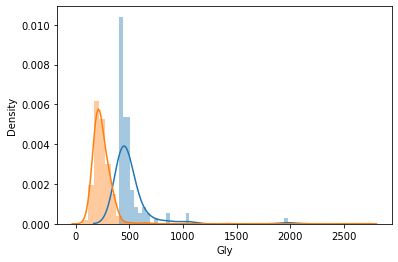

In [57]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.GE.OA.non.specific']['Gly'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.GE.OA.non.specific']['Gly'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


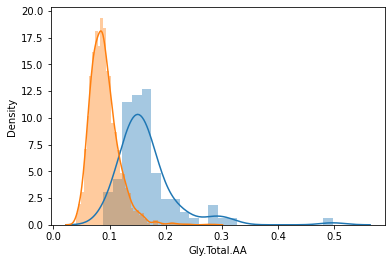

In [58]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.GE.OA.non.specific']['Gly.Total.AA'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.GE.OA.non.specific']['Gly.Total.AA'])
plt.show()


# X.OTC.CPS1

/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


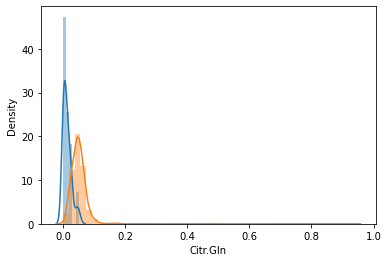

In [63]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.OTC.CPS1']['Citr.Gln'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.OTC.CPS1']['Citr.Gln'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


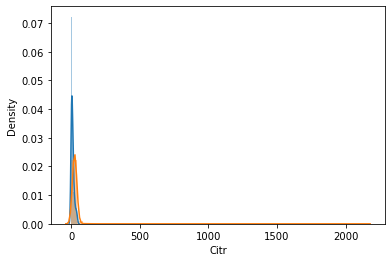

In [64]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.OTC.CPS1']['Citr'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.OTC.CPS1']['Citr'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


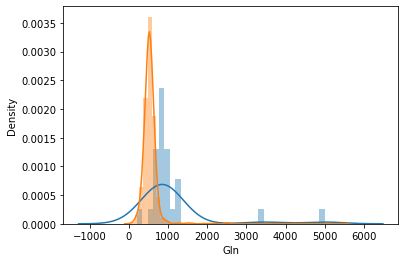

In [65]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.OTC.CPS1']['Gln'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.OTC.CPS1']['Gln'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


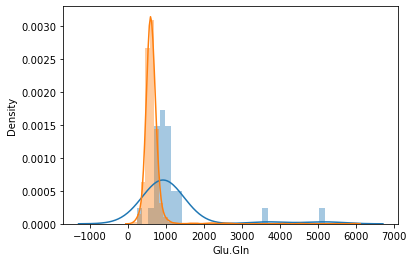

In [66]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.OTC.CPS1']['Glu.Gln'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.OTC.CPS1']['Glu.Gln'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


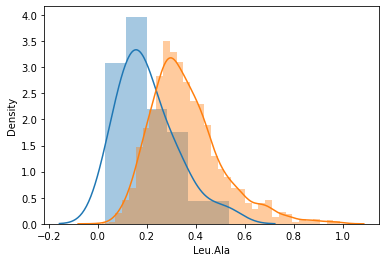

In [67]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.OTC.CPS1']['Leu.Ala'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.OTC.CPS1']['Leu.Ala'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


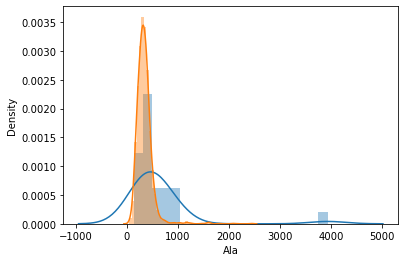

In [68]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.OTC.CPS1']['Ala'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.OTC.CPS1']['Ala'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


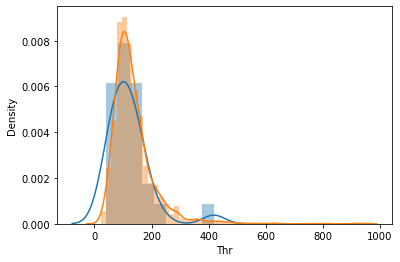

In [69]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.OTC.CPS1']['Thr'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.OTC.CPS1']['Thr'])
plt.show()


# X.Hyperammonaemia

/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


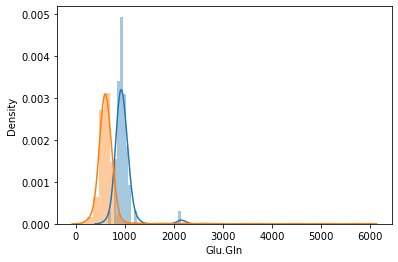

In [70]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.Hyperammonaemia']['Glu.Gln'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.Hyperammonaemia']['Glu.Gln'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


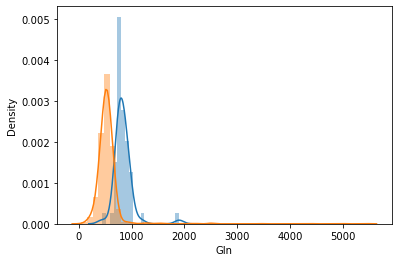

In [71]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.Hyperammonaemia']['Gln'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.Hyperammonaemia']['Gln'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


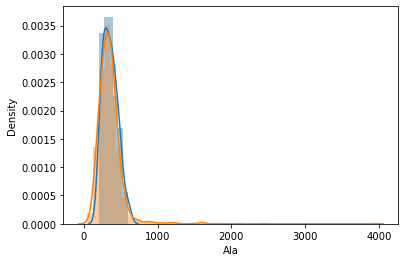

In [72]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.Hyperammonaemia']['Ala'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.Hyperammonaemia']['Ala'])
plt.show()


In [ ]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.Hyperammonaemia']['Ala'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.Hyperammonaemia']['Ala'])
plt.show()


/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/serhat.say/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


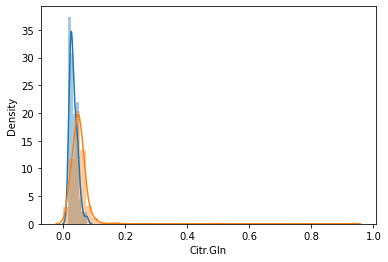

In [73]:
sns.distplot(df_multiclass[df_multiclass.Class == 'X.Hyperammonaemia']['Citr.Gln'])
sns.distplot(df_multiclass[df_multiclass.Class != 'X.Hyperammonaemia']['Citr.Gln'])
plt.show()


X.Hyperammonaemia old f1 score: 0.615
F1 score for class: X.Hyperammonaemia  is  0.6842105263157896 which has  54  length


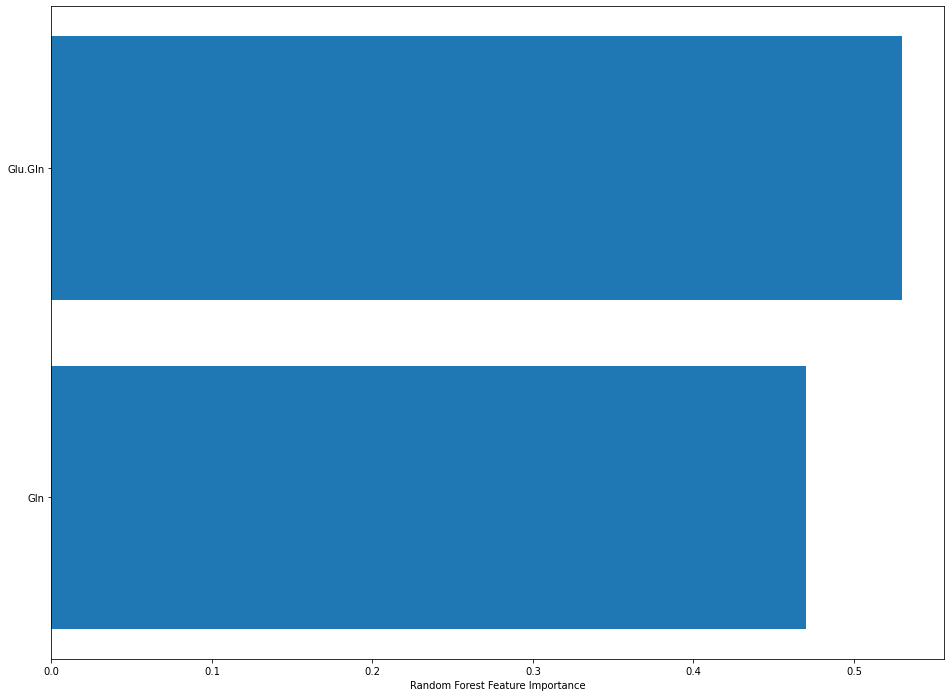

In [79]:
df = df_multiclass.copy()
print('X.Hyperammonaemia old f1 score: 0.615')


df['Class'] = np.where(df.Class=='X.Hyperammonaemia',1,0)


col_list = list(df.columns)

#feature_list = [e for e in col_list if e not in ['SID','Class']]
feature_list = ['Glu.Gln','Gln']
labels = df['Class']

features = pd.get_dummies(df[feature_list])

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

f1 = f1_score(test_labels, predictions)

print('F1 score for class: X.Hyperammonaemia',' is ', f1, 'which has ',df['Class'].sum(),' length')

sorted_idx = rf.feature_importances_.argsort()
fig, axes = plt.subplots(figsize=(16,12))
plt.barh(train_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")




plt.show()

X.OTC.CPS1 old f1 score: 0.462
F1 score for class: X.OTC.CPS1  is  0.5714285714285715 which has  27  length


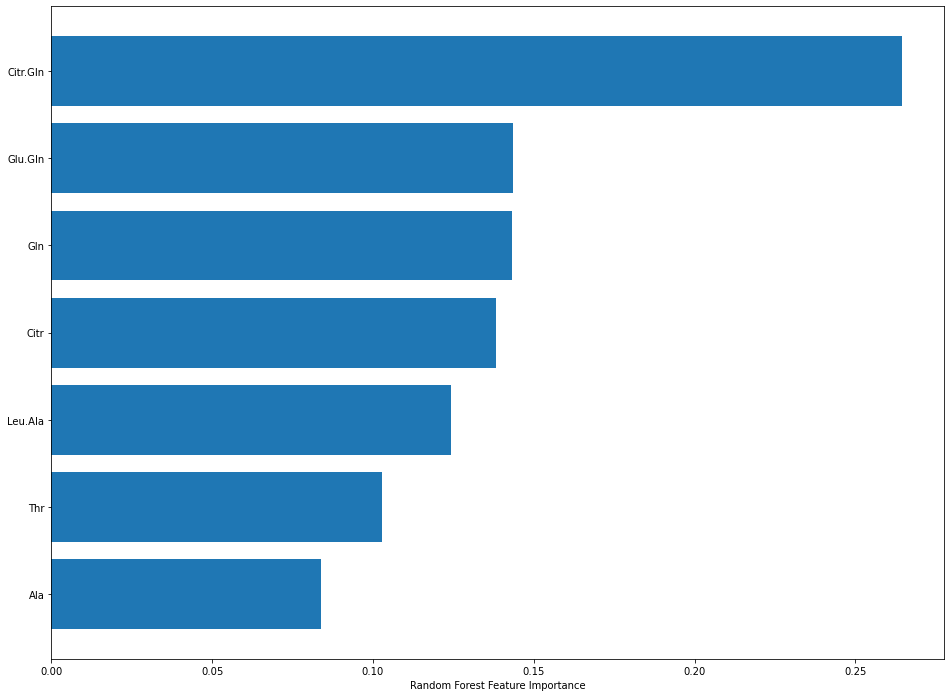

In [80]:
df = df_multiclass.copy()
print('X.OTC.CPS1 old f1 score: 0.462')


df['Class'] = np.where(df.Class=='X.OTC.CPS1',1,0)


col_list = list(df.columns)

#feature_list = [e for e in col_list if e not in ['SID','Class']]
feature_list = ['Citr.Gln','Citr','Gln','Glu.Gln','Leu.Ala','Ala','Thr']
labels = df['Class']

features = pd.get_dummies(df[feature_list])

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

f1 = f1_score(test_labels, predictions)

print('F1 score for class: X.OTC.CPS1',' is ', f1, 'which has ',df['Class'].sum(),' length')

sorted_idx = rf.feature_importances_.argsort()
fig, axes = plt.subplots(figsize=(16,12))
plt.barh(train_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")




plt.show()

X.GE.OA.non.specific old f1 score: 0.756
F1 score for class: X.GE.OA.non.specific  is  0.9310344827586207 which has  97  length


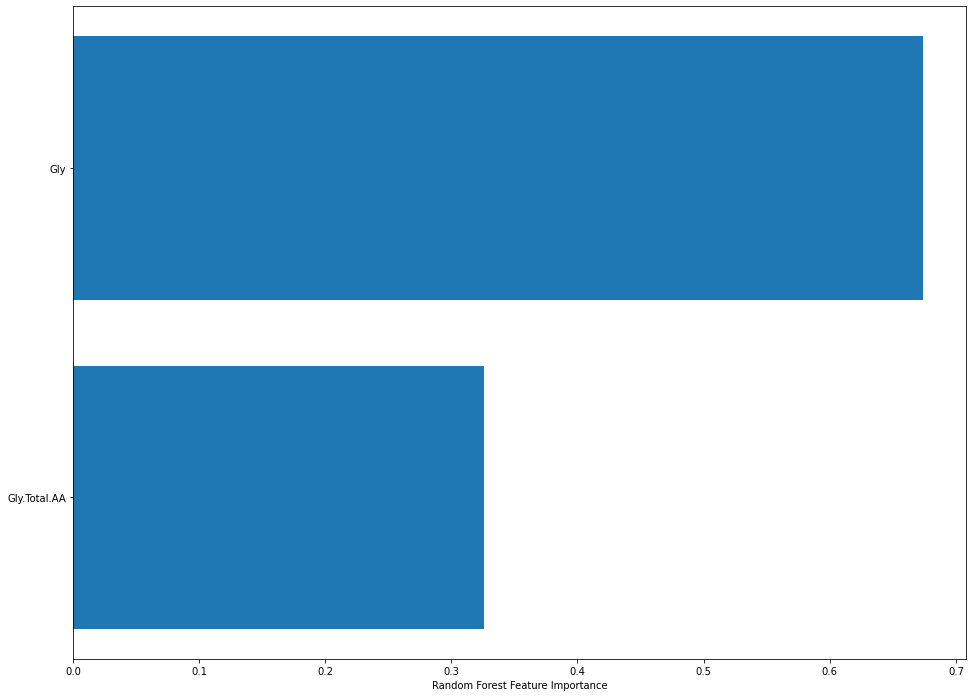

In [81]:
df = df_multiclass.copy()
print('X.GE.OA.non.specific old f1 score: 0.756')


df['Class'] = np.where(df.Class=='X.GE.OA.non.specific',1,0)


col_list = list(df.columns)

#feature_list = [e for e in col_list if e not in ['SID','Class']]
feature_list = ['Gly','Gly.Total.AA']
labels = df['Class']

features = pd.get_dummies(df[feature_list])

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

f1 = f1_score(test_labels, predictions)

print('F1 score for class: X.GE.OA.non.specific',' is ', f1, 'which has ',df['Class'].sum(),' length')

sorted_idx = rf.feature_importances_.argsort()
fig, axes = plt.subplots(figsize=(16,12))
plt.barh(train_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")




plt.show()

In [50]:
df

,SID,SEX,Tau,Thr,Ser,Glu,Gln,Pro,Gly,Ala,Citr,Val,Met,Ile,Leu,Tyr,Phe,Orn,Lys,His,Arg,ASA,Allo,Hcys,Glu.Gln,Citr.Gln,Gly.Total.AA,BCAA.Total.AA,Leu.Ala,Class
0,1.0,M,174.0,55.0,85.0,205.0,1579.0,204.0,272.0,605.0,252.0,99.0,56.0,20.0,62.0,188.0,52.0,18.0,102.0,109.0,13.0,Y,N,N,1784.0,0.159595,0.065542,0.043614,0.102479,0
1,2.0,F,56.0,54.0,107.0,125.0,633.0,156.0,321.0,378.0,174.0,90.0,22.0,23.0,48.0,48.0,37.0,57.0,120.0,84.0,52.0,Y,N,N,758.0,0.274882,0.124178,0.062282,0.126984,0
2,3.0,F,50.0,50.0,65.0,71.0,620.0,166.0,244.0,338.0,107.0,128.0,14.0,58.0,72.0,38.0,42.0,60.0,60.0,75.0,73.0,Y,N,N,691.0,0.172581,0.104676,0.110682,0.213018,0
3,4.0,F,74.0,64.0,85.0,60.0,516.0,272.0,239.0,377.0,125.0,166.0,18.0,45.0,80.0,58.0,46.0,119.0,73.0,79.0,67.0,Y,N,N,576.0,0.242248,0.093250,0.113539,0.212202,0
6,7.0,M,113.0,137.0,135.0,140.0,4390.0,587.0,449.0,500.0,2140.0,194.0,84.0,29.0,107.0,335.0,91.0,111.0,563.0,187.0,122.0,N,N,N,4530.0,0.487472,0.043115,0.031688,0.214000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,2080.0,M,39.0,73.0,59.0,21.0,554.0,219.0,170.0,281.0,29.0,183.0,11.0,35.0,86.0,48.0,52.0,48.0,95.0,74.0,34.0,N,N,N,575.0,0.052347,0.080531,0.144008,0.306050,1
2080,2081.0,F,68.0,103.0,120.0,50.0,502.0,112.0,200.0,277.0,23.0,212.0,23.0,48.0,112.0,46.0,53.0,67.0,195.0,81.0,58.0,N,N,N,552.0,0.045817,0.085106,0.158298,0.404332,1
2081,2082.0,F,61.0,56.0,114.0,145.0,498.0,98.0,214.0,245.0,25.0,110.0,36.0,38.0,58.0,48.0,59.0,54.0,114.0,50.0,31.0,N,N,N,643.0,0.050201,0.104187,0.100292,0.236735,1
2082,2083.0,M,80.0,80.0,94.0,60.0,468.0,135.0,196.0,387.0,19.0,175.0,13.0,34.0,64.0,53.0,41.0,51.0,107.0,76.0,36.0,N,N,N,528.0,0.040598,0.090364,0.125864,0.165375,1


In [ ]:
X.GE.OA.non.specific , X.OTC.CPS1, X.Hyperammonaemia